In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv("Volume_Curah_Hujan_dan_kejadian_banjir_di_Jawa_Barat_Tahun_2020-2023.csv")

data = df[['nama_kabupaten_kota', 'tinggi_hujan', 'jumlah_banjir', 'tahun']]
data.head()

,nama_kabupaten_kota,tinggi_hujan,jumlah_banjir,tahun
0,KABUPATEN BOGOR,2077,43,2020
1,KABUPATEN BOGOR,2356,75,2021
2,KABUPATEN BOGOR,1350,28,2022
3,KABUPATEN BOGOR,1694,29,2023
4,KOTA BOGOR,4310,10,2020


In [25]:
mean_hujan = np.mean(data['tinggi_hujan'])
std_hujan = np.std(data['tinggi_hujan'])
median_hujan = np.median(data['tinggi_hujan'])

mean_banjir = np.mean(data['jumlah_banjir'])
std_banjir = np.std(data['jumlah_banjir'])
median_banjir = np.median(data['jumlah_banjir'])

print("Tinggi Curah hujan (mm)")
print(f"Rata-rata: {mean_hujan:.2f}, Median: {median_hujan}, Standar Deviasi: {std_hujan:.2f}")

print ("\n Jumlah Banjir (kejadian)")
print(f"Rata-rata: {mean_banjir:.2f}, Median: {median_banjir}, Standar Deviasi: {std_banjir:.2f}")

Tinggi Curah hujan (mm)
Rata-rata: 2355.50, Median: 2241.0, Standar Deviasi: 1258.78

 Jumlah Banjir (kejadian)
Rata-rata: 15.50, Median: 9.0, Standar Deviasi: 19.43


<function matplotlib.pyplot.show(close=None, block=None)>

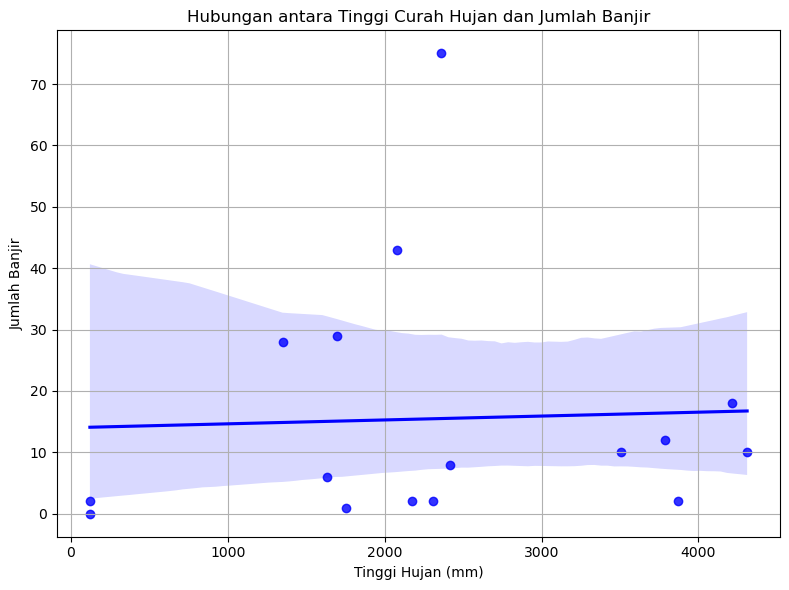

In [27]:
plt.figure(figsize=(8, 6))
sns.regplot(x='tinggi_hujan', y='jumlah_banjir', data=data, color='blue')
plt.title('Hubungan antara Tinggi Curah Hujan dan Jumlah Banjir')
plt.xlabel('Tinggi Hujan (mm)')
plt.ylabel('Jumlah Banjir')
plt.grid(True)
plt.tight_layout()
plt.show

In [29]:
X = data['tinggi_hujan'].values.reshape(-1, 1)
y = data['jumlah_banjir'].values

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

slope = model.coef_[0]
intercept = model.intercept_
r2 = r2_score(y, y_pred)

print(f"Persemaan regresi:")
print(f"jumlah_banjir = {slope:4f} * tinggi_hujan + {intercept:.2f}")
print(f"R2 (koefisien determinasi): {r2:.4f}")

Persemaan regresi:
jumlah_banjir = 0.000633 * tinggi_hujan + 14.01
R2 (koefisien determinasi): 0.0017


<function matplotlib.pyplot.show(close=None, block=None)>

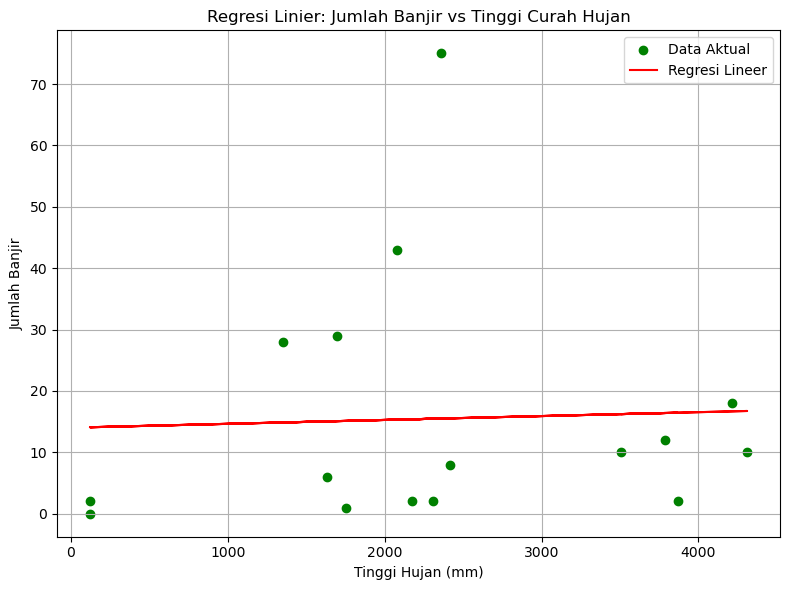

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='green', label='Data Aktual')
plt.plot(X, y_pred, color='red', label='Regresi Lineer')
plt.xlabel('Tinggi Hujan (mm)')
plt.ylabel('Jumlah Banjir')
plt.title('Regresi Linier: Jumlah Banjir vs Tinggi Curah Hujan')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show